<a href="https://colab.research.google.com/github/hargurjeet/Recommedation-Systems/blob/main/Anime_Recommendation_Item_Based_CosineSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Upload kaggle.jason
# please follow this link incase not aware: https://www.kaggle.com/general/74235
from google.colab import files
files.upload()

! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/CooperUnion/anime-recommendations-database'
od.download(dataset_url)

Saving kaggle.json to kaggle.json


 20%|█▉        | 5.00M/25.0M [00:00<00:00, 30.1MB/s]

100%|██████████| 25.0M/25.0M [00:00<00:00, 72.2MB/s]


In [2]:
anime_data=pd.read_csv("/content/anime-recommendations-database/anime.csv")
rating_data=pd.read_csv("/content/anime-recommendations-database/rating.csv")

In [3]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


Before I join let us rename few column to avoid confusion also improving the formatting

In [5]:
anime_data = anime_data.rename(columns={'rating': 'Average_Rating', 'name':'Name', 'genre':'Genre', 'type': 'Type', 'episodes': 'Episodes', 
                                        'members':'Members'})
anime_data.head()

,anime_id,Name,Genre,Type,Episodes,Average_Rating,Members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
anime_data.Type.value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: Type, dtype: int64

In [7]:
rating_data = rating_data.rename(columns={'rating': 'Actual_Rating', 'user_id':'User_id'})
rating_data.head()

,User_id,anime_id,Actual_Rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [8]:
full_data=anime_data.merge(rating_data,how='left', on='anime_id')
full_data.shape
full_data.head()

,anime_id,Name,Genre,Type,Episodes,Average_Rating,Members,User_id,Actual_Rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99.0,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152.0,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244.0,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271.0,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278.0,-1.0


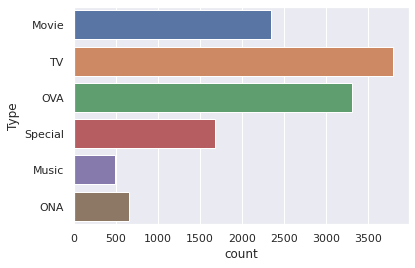

In [9]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.countplot(y="Type", data=anime_data)

Maz reviews against anime

In [10]:
Top_10_Anime = full_data.groupby('Name')['User_id'].count().sort_values(ascending=False).head(10).reset_index()
Top_10_Anime

,Name,User_id
0,Death Note,39340
1,Sword Art Online,30583
2,Shingeki no Kyojin,29584
3,Code Geass: Hangyaku no Lelouch,27718
4,Elfen Lied,27506
5,Angel Beats!,27183
6,Naruto,25925
7,Fullmetal Alchemist,25032
8,Fullmetal Alchemist: Brotherhood,24574
9,Toradora!,24283


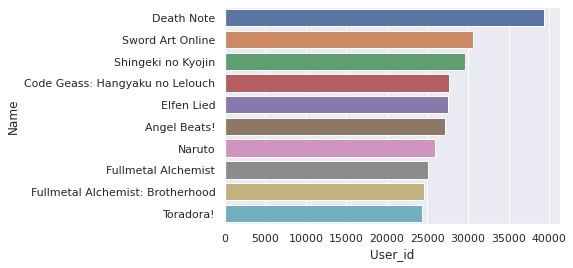

In [11]:
sns.barplot(y='Name', x="User_id", data=Top_10_Anime)

In [12]:
rating_data.head()

,User_id,anime_id,Actual_Rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [13]:
rating_data_with_Anime_name = rating_data.merge(anime_data[['Name', 'anime_id']], on='anime_id', how='left')
rating_data_with_Anime_name.head(10)

,User_id,anime_id,Actual_Rating,Name
0,1,20,-1,Naruto
1,1,24,-1,School Rumble
2,1,79,-1,Shuffle!
3,1,226,-1,Elfen Lied
4,1,241,-1,Girls Bravo: First Season
5,1,355,-1,Shakugan no Shana
6,1,356,-1,Fate/stay night
7,1,442,-1,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...
8,1,487,-1,Girls Bravo: Second Season
9,1,846,-1,School Rumble Ni Gakki


In [14]:
ratings = rating_data_with_Anime_name.groupby('Name')['Actual_Rating'].mean().reset_index()
ratings.rename(columns={'Actual_Rating': 'Avg_Rating'}, inplace=True)
ratings.head()

,Name,Avg_Rating
0,&quot;0&quot;,2.769231
1,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,0.000000
2,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,5.774936
3,&quot;Bungaku Shoujo&quot; Memoire,6.155748
4,&quot;Bungaku Shoujo&quot; Movie,6.457980


In [15]:
ratings_count = rating_data_with_Anime_name.groupby(['Name'])['Actual_Rating'].count().reset_index()
ratings_count.rename(columns={'Actual_Rating':'number_of_ratings'}, inplace=True)

ratings_count.head()

,Name,number_of_ratings
0,&quot;0&quot;,26
1,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,2
2,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,782
3,&quot;Bungaku Shoujo&quot; Memoire,809
4,&quot;Bungaku Shoujo&quot; Movie,1535


In [16]:
ratings['number_of_ratings']= ratings_count.number_of_ratings
ratings

,Name,Avg_Rating,number_of_ratings
0,&quot;0&quot;,2.769231,26
1,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,0.000000,2
2,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,5.774936,782
3,&quot;Bungaku Shoujo&quot; Memoire,6.155748,809
4,&quot;Bungaku Shoujo&quot; Movie,6.457980,1535
...,...,...,...
11191,xxxHOLiC Kei,6.720774,3413
11192,xxxHOLiC Movie: Manatsu no Yoru no Yume,6.313742,2365
11193,xxxHOLiC Rou,6.403173,1513
11194,xxxHOLiC Shunmuki,6.238602,1974


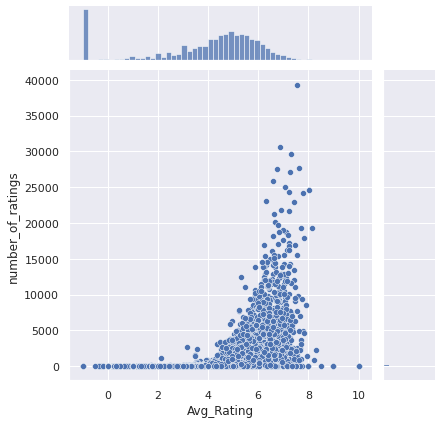

In [17]:
#Plotting the jointplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.jointplot(x='Avg_Rating', y='number_of_ratings', data=ratings);

Highly rated anime series based on community members

In [18]:
full_data.head()

,anime_id,Name,Genre,Type,Episodes,Average_Rating,Members,User_id,Actual_Rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99.0,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152.0,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244.0,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271.0,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278.0,-1.0


In [19]:
Anime_community = full_data.drop_duplicates(subset= ['Name', 'Members'], keep='first').sort_values(by='Members', ascending=False).head(10)
Anime_community

,anime_id,Name,Genre,Type,Episodes,Average_Rating,Members,User_id,Actual_Rating
344258,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,3.0,10.0
568941,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229,1.0,-1.0
3160089,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100,1.0,10.0
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3.0,10.0
1007982,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796,1.0,-1.0
159820,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151,7.0,9.0
3277920,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297,1.0,-1.0
28159,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5.0,9.0
2127668,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190,4.0,-1.0
856702,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817,1.0,-1.0


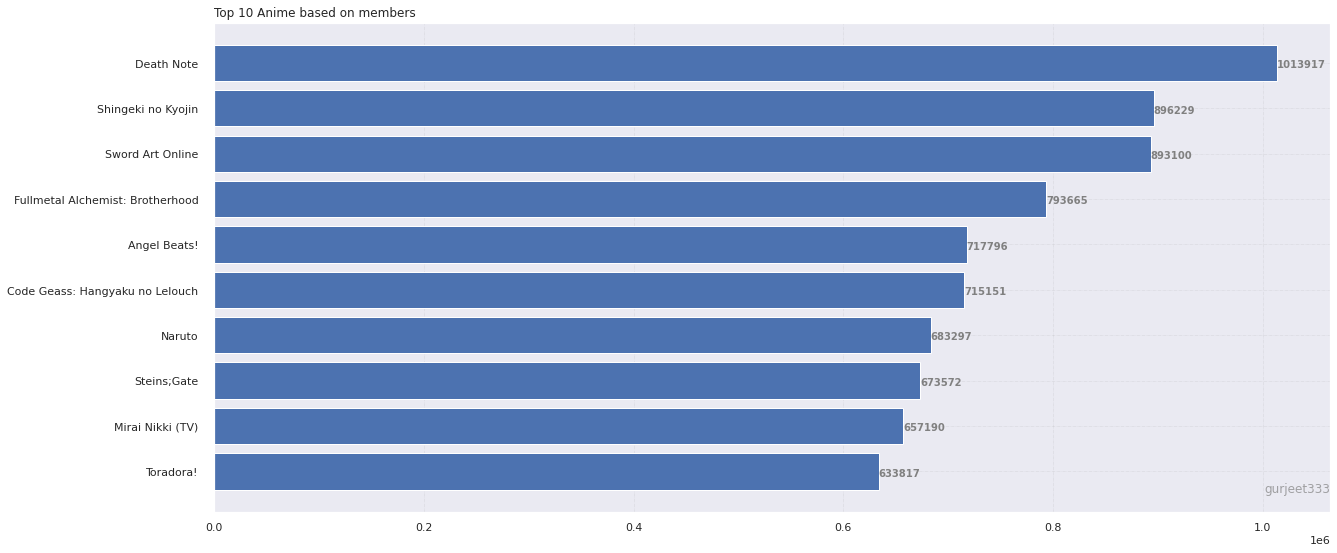

In [20]:
# Figure Size
fig, ax = plt.subplots(figsize =(20, 9))
 
# Horizontal Bar Plot
ax.barh(Anime_community.Name.head(10), Anime_community.Members.head(10))

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
# Add Text watermark
fig.text(0.9, 0.15, 'gurjeet333', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 # Add Plot Title
ax.set_title('Top 10 Anime based on members',
             loc ='left', )

# Show Plot
plt.show()

In [21]:
anime_data

,anime_id,Name,Genre,Type,Episodes,Average_Rating,Members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [22]:
anime_data.Type.value_counts().values

array([3787, 3311, 2348, 1676,  659,  488])

In [23]:
import plotly.express as px
# Figure Size

fig = px.pie(anime_data, values=anime_data.Type.value_counts().values, names=anime_data.Type.value_counts().index, title='Medium of streaming',width=400, height=400)
fig.update_layout(
    paper_bgcolor="LightSteelBlue",
)

fig.show()

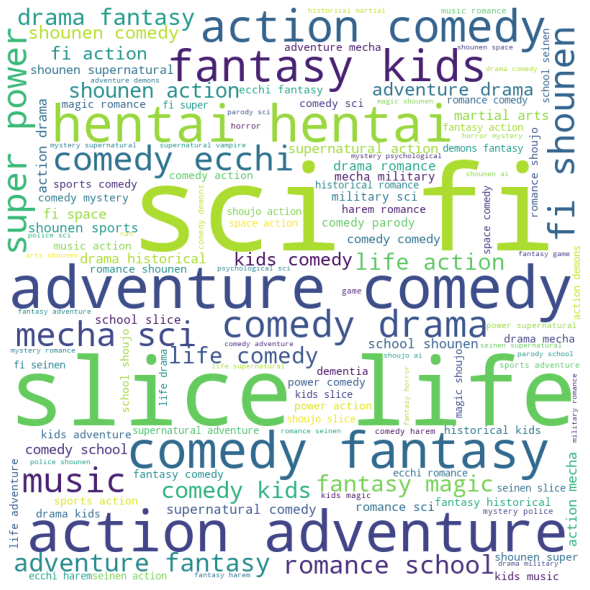

In [24]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in anime_data.Genre:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [25]:
full_data

,anime_id,Name,Genre,Type,Episodes,Average_Rating,Members,User_id,Actual_Rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99.0,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152.0,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244.0,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271.0,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278.0,-1.0
...,...,...,...,...,...,...,...,...,...
7814819,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532.0,-1.0
7814820,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766.0,-1.0
7814821,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365.0,4.0
7814822,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364.0,-1.0


In [26]:
full_data.Actual_Rating.replace(to_replace=-1, value=0, inplace=True)

In [27]:
full_data.isnull().sum()

anime_id             0
Name                 0
Genre              140
Type                28
Episodes             0
Average_Rating     233
Members              0
User_id           1097
Actual_Rating     1097
dtype: int64

In [28]:
full_data.dropna(axis=0, how='any', inplace=True)

In [29]:
full_data.isnull().sum()

anime_id          0
Name              0
Genre             0
Type              0
Episodes          0
Average_Rating    0
Members           0
User_id           0
Actual_Rating     0
dtype: int64

In [30]:
Valid_Users = full_data.User_id.value_counts().reset_index()
Valid_Users = Valid_Users.rename(columns={'index': 'User_id', 'User_id': 'User_Counts'})
Valid_Users

,User_id,User_Counts
0,48766.0,10225
1,42635.0,3747
2,53698.0,2905
3,57620.0,2702
4,59643.0,2633
...,...,...
73510,24060.0,1
73511,24055.0,1
73512,1925.0,1
73513,24020.0,1


In [31]:
Valid_Users.User_id = Valid_Users.User_id.astype(int)
Valid_Users

,User_id,User_Counts
0,48766,10225
1,42635,3747
2,53698,2905
3,57620,2702
4,59643,2633
...,...,...
73510,24060,1
73511,24055,1
73512,1925,1
73513,24020,1


In [32]:
Valid_Users = Valid_Users[Valid_Users.User_Counts>=200]
Valid_Users

,User_id,User_Counts
0,48766,10225
1,42635,3747
2,53698,2905
3,57620,2702
4,59643,2633
...,...,...
11273,2021,200
11274,61652,200
11275,60256,200
11276,73080,200


In [33]:
full_data_Valid_Users = full_data[full_data.User_id.isin(Valid_Users.User_id)]

In [34]:
full_data_Valid_Users.User_id = full_data_Valid_Users.User_id.astype(int)
full_data_Valid_Users

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,anime_id,Name,Genre,Type,Episodes,Average_Rating,Members,User_id,Actual_Rating
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8.0
11,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10.0
13,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,684,0.0
...,...,...,...,...,...,...,...,...,...
7814819,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,0.0
7814820,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,0.0
7814821,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4.0
7814822,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,0.0


In [35]:
full_data_Valid_Users.describe()

,anime_id,Average_Rating,Members,User_id,Actual_Rating
count,4.189197e+06,4.189197e+06,4.189197e+06,4.189197e+06,4.189197e+06
mean,9.699494e+03,7.553823e+00,1.424088e+05,3.679533e+04,6.105350e+00
std,9.182514e+03,6.827030e-01,1.593791e+05,2.077870e+04,3.346782e+00
min,1.000000e+00,1.670000e+00,2.900000e+01,5.000000e+00,0.000000e+00
25%,1.639000e+03,7.150000e+00,3.251400e+04,1.959300e+04,5.000000e+00
50%,6.973000e+03,7.570000e+00,8.724000e+04,3.742700e+04,7.000000e+00
75%,1.522500e+04,8.030000e+00,1.938220e+05,5.449900e+04,8.000000e+00
max,3.451900e+04,9.500000e+00,1.013917e+06,7.350700e+04,1.000000e+01


In [36]:
anime_pivot=full_data_Valid_Users.pivot_table(index='Name',columns='User_id',values='Actual_Rating').fillna(0)
anime_pivot.head()

User_id,5,7,17,38,43,46,54,123,129,139,160,198,201,210,226,232,233,235,244,248,250,256,261,270,271,282,285,288,294,296,301,308,317,321,326,341,342,352,372,373,...,73286,73288,73298,73301,73308,73317,73320,73324,73325,73328,73329,73340,73341,73343,73346,73350,73356,73359,73362,73376,73378,73379,73380,73389,73395,73406,73408,73417,73422,73457,73460,73462,73476,73477,73485,73491,73499,73502,73503,73507
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,9.0,0.0,7.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0


# Collaborative Filtering

In [39]:
from scipy.sparse import csr_matrix

anime_matrix = csr_matrix(anime_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [45]:
anime_pivot.shape

(11153, 11278)

In [52]:
anime_pivot.iloc[5, :].values.reshape(1, -1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [53]:
distances, indices = model_knn.kneighbors(anime_pivot.iloc[5,:].values.reshape(1, -1), n_neighbors = 6)

In [63]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_pivot.index[5]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for &quot;Eiji&quot;:

1: Love Position: Halley Densetsu, with distance of 0.5796753823067573:
2: Goro-chan, with distance of 0.6268348352411296:
3: Tama Gura Abayo: Moki Yumokyu Superdeluxe, with distance of 0.6321563945264468:
4: Tsuritama: Harikitte Contest, with distance of 0.6461008358369529:
5: Kinyoru, Abe Reiji: Heikinteki na Salaryman no Ijou na Nichijou, with distance of 0.6461008358369529:
